## Numerical solution of ODEs

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'axes.labelsize': 18})
import numpy as np

In [13]:
def forward_euler(f, u, dt):
    return u + dt*f(u)

def backward_euler(f, dfdu, u, dt):
    deltau = np.dot( np.linalg.inv(np.eye(2) - dt*dfdu(u)), dt*f(u) )
    return u + deltau

#### Example: Undamped pendulum

$$\ddot{\phi} = - \frac{g}{l}\sin(\phi(t))$$

In [26]:
gravity = 10
length  = 1
T       = 10.
N       = 100
deltat  = T / N
t = np.linspace(0,T,N)

def f(u): 
    return np.array([u[1], -gravity/length * np.sin(u[0])])
    
def dfdu(u):
    return np.array([[0,1],[-gravity/length * np.sin(u[1]), 0]])

Text(0, 0.5, "$\\phi'$")

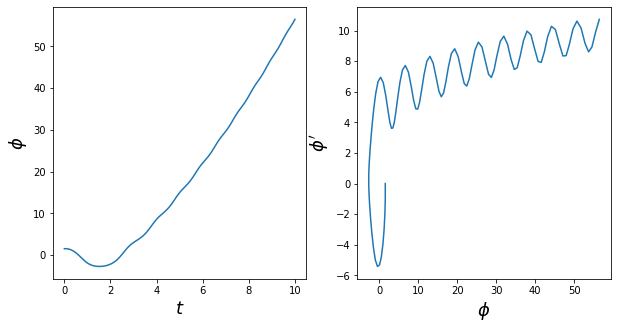

In [28]:
def solve(initial_angle):
    M = 2
    u = np.zeros((N, M))
    u[0,:] = [initial_angle, 0]
    for i in range(N-1):
        u[i+1,:] = forward_euler(f, u[i], deltat)
        #u[i+1,:] = backward_euler(f, dfdu, u[i], deltat)
    return u

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for ic in [np.pi/2]: #np.linspace(0,1,21)*np.pi:
    u = solve(ic)
    ax.plot(np.linspace(0,N*deltat,N), u[:,0], '-')
    ax2.plot(u[:,0], u[:,1], '-')
ax.set_xlabel('$t$'); ax.set_ylabel(r'$\phi$')
ax2.set_xlabel('$\phi$'); ax2.set_ylabel(r"$\phi'$")